<a href="https://colab.research.google.com/github/ManishSuhas0026/MachineLearning/blob/main/ML_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('/content/employee_data (1) 2.csv')

In [4]:
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


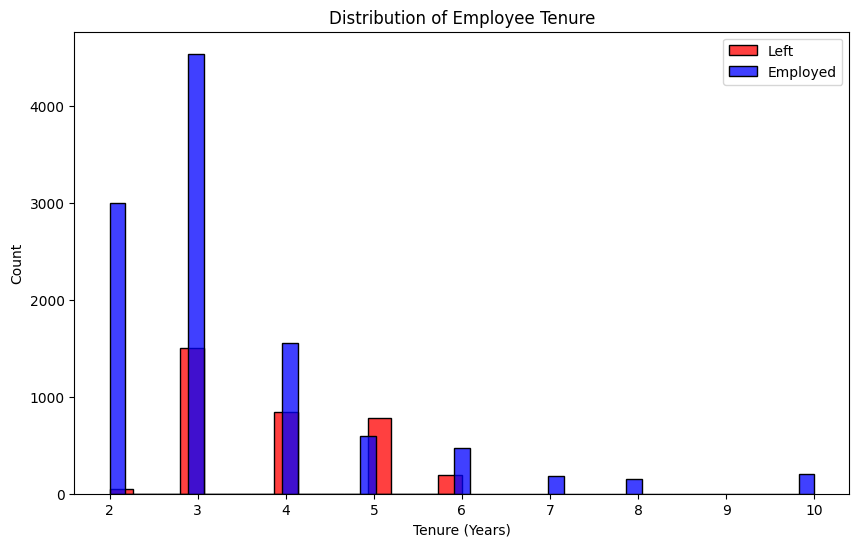

In [7]:
left_employees = df[df['status'] == 'Left']
current_employees = df[df['status'] == 'Employed']

plt.figure(figsize=(10, 6))
sns.histplot(left_employees['tenure'], color='red', label='Left')
sns.histplot(current_employees['tenure'], color='blue', label='Employed')

plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')
plt.legend()

plt.show()

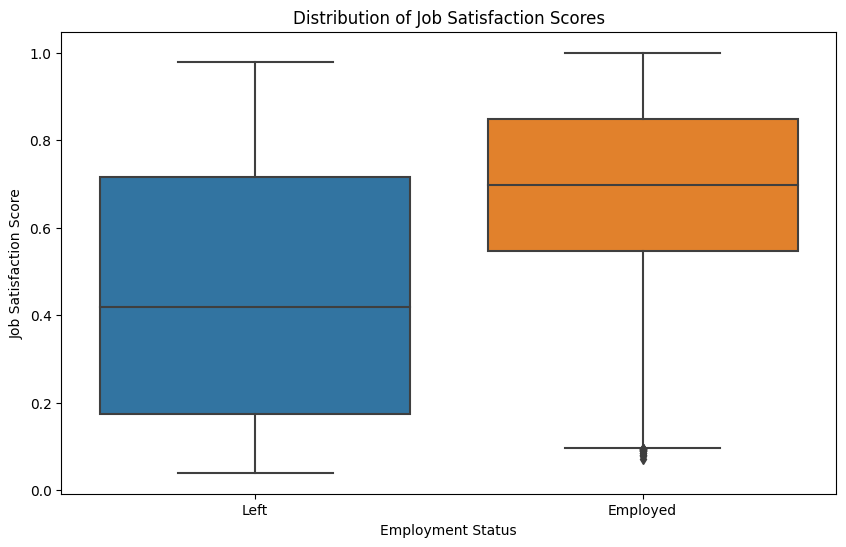

In [10]:
left_employees = df[df['status'] == 'Left']
current_employees = df[df['status'] == 'Employed']

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction', data=pd.concat([left_employees, current_employees]))

plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores')
plt.show()

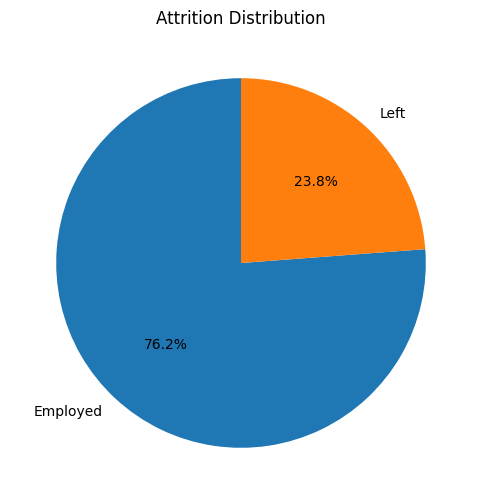

In [11]:
attrition_counts = df['status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')
plt.show()

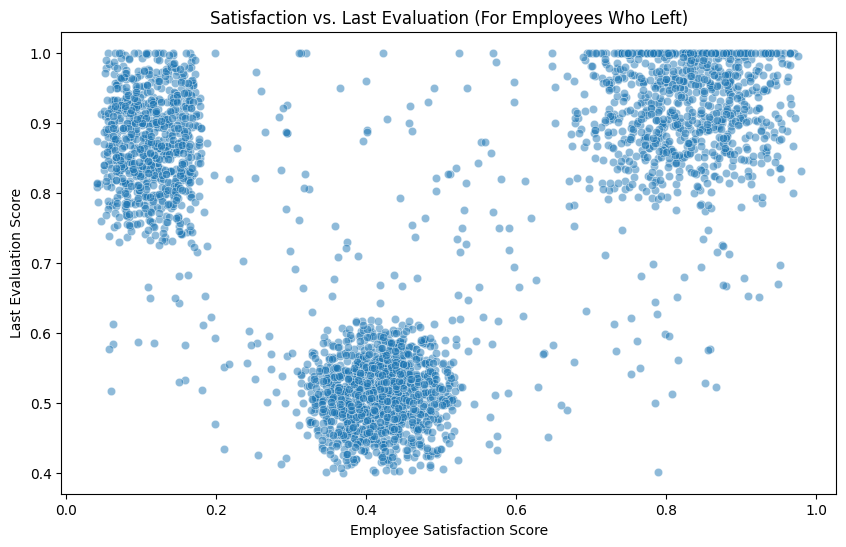

Correlation coefficient for employees who left: 0.18


In [12]:
left_employees = df[df['status'] == 'Left']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees, alpha=0.5)
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Satisfaction vs. Last Evaluation (For Employees Who Left)')
plt.show()

correlation = left_employees['satisfaction'].corr(left_employees['last_evaluation'])
print(f"Correlation coefficient for employees who left: {correlation:.2f}")


In [13]:
df['last_evaluation'].fillna(df['last_evaluation'].median(), inplace=True)
df['satisfaction'].fillna(df['satisfaction'].mean(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [14]:
df['department'].fillna('Unknown', inplace=True)
df['filed_complaint'].fillna(0, inplace=True)
df['recently_promoted'].fillna(0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         14249 non-null  object 
 2   filed_complaint    14249 non-null  float64
 3   last_evaluation    14249 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  14249 non-null  float64
 6   salary             14249 non-null  object 
 7   satisfaction       14249 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14249 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df[['tenure', 'satisfaction', 'n_projects']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

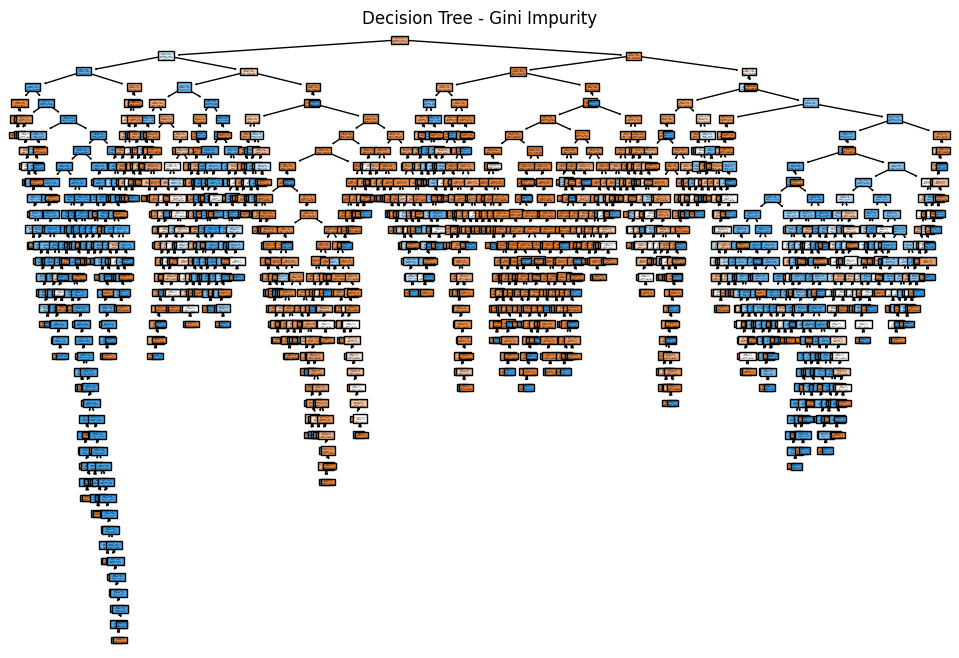

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Gini Impurity')
plt.show()

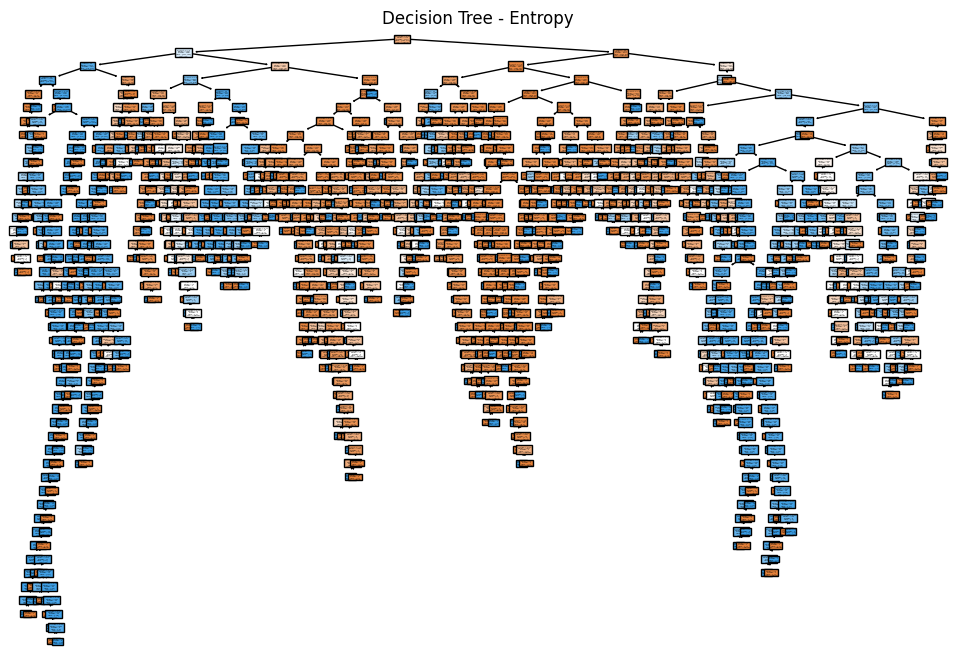

In [19]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Entropy')
plt.show()

In [20]:
def evaluate_model(clf, X_test, y_test):
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='Left')
  recall = recall_score(y_test, y_pred, pos_label='Left')
  f1 = f1_score(y_test, y_pred, pos_label='Left')
  cm = confusion_matrix(y_test, y_pred, labels=['Employed', 'Left'])
  return accuracy, precision, recall, f1, cm

accuracy_gini, precision_gini, recall_gini, f1_gini, cm_gini = evaluate_model(clf_gini, X_test, y_test)
accuracy_entropy, precision_entorpy, recall_entropy, f1_entropy, cm_entropy = evaluate_model(clf_entropy, X_test, y_test)


In [21]:
print("Model Evaluation - Gini Impurity")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1 Score: {f1_gini:.2f}")
print(f"Confusion Matrix: ")
print(cm_gini)

Model Evaluation - Gini Impurity
Accuracy: 0.92
Precision: 0.86
Recall: 0.81
F1 Score: 0.83
Confusion Matrix: 
[[2067   94]
 [ 128  561]]


In [22]:
print("Model Evaluation - Etropy")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entorpy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1 Score: {f1_entropy:.2f}")
print(f"Confusion Matrix: ")
print(cm_entropy)

Model Evaluation - Etropy
Accuracy: 0.93
Precision: 0.86
Recall: 0.82
F1 Score: 0.84
Confusion Matrix: 
[[2072   89]
 [ 122  567]]


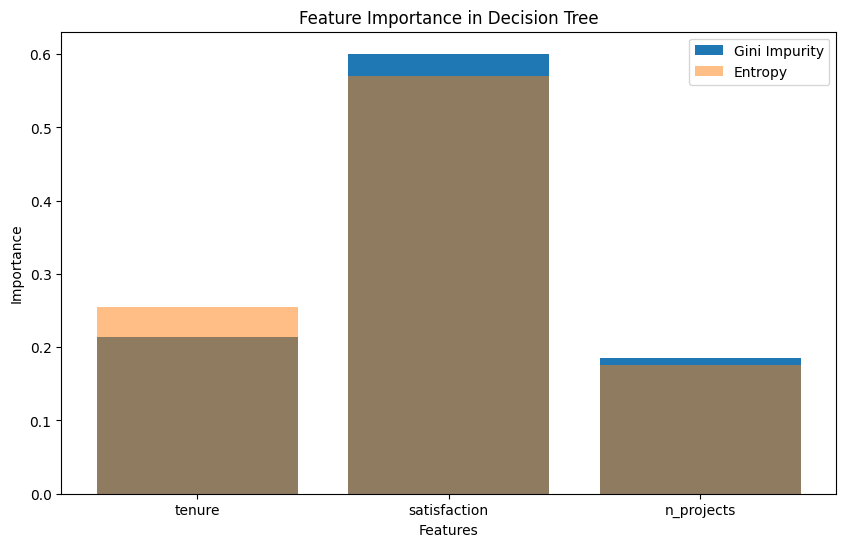

In [23]:
feature_importance_gini = clf_gini.feature_importances_
feature_importance_entropy = clf_entropy.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(X.columns, feature_importance_gini, label='Gini Impurity')
plt.bar(X.columns, feature_importance_entropy, label='Entropy', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.legend()
plt.show()